
**About the dataset**

customerID - customer id

gender - client gender (male / female)

SeniorCitizen - is the client retired (1, 0)

Partner - is the client married (Yes, No)

tenure - how many months a person has been a client of the company

PhoneService - is the telephone service connected (Yes, No)

MultipleLines - are multiple phone lines connected (Yes, No, No phone service)

InternetService - client's Internet service provider (DSL, Fiber optic, No)

OnlineSecurity - is the online security service connected (Yes, No, No internet service)

OnlineBackup - is the online backup service activated (Yes, No, No internet service)

DeviceProtection - does the client have equipment insurance (Yes, No, No internet service)

TechSupport - is the technical support service connected (Yes, No, No internet service)

StreamingTV - is the streaming TV service connected (Yes, No, No internet service)

StreamingMovies - is the streaming cinema service activated (Yes, No, No internet service)

Contract - type of customer contract (Month-to-month, One year, Two year)

PaperlessBilling - whether the client uses paperless billing (Yes, No)

PaymentMethod - payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit 

card (automatic))

MonthlyCharges - current monthly payment

TotalCharges - the total amount that the client paid for the services for the entire time

Churn - whether there was a churn (Yes or No)

In [219]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split , cross_val_score , RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_tree

In [93]:
df = pd.read_csv("telecom users dataset/telecom_users.csv")
df.shape

(5986, 22)

In [94]:
df.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


# EDA

In [95]:
df.columns.values

array(['Unnamed: 0', 'customerID', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'], dtype=object)

In [96]:
df.drop(columns=['Unnamed: 0' ], inplace=True) #dropping the first column
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 21 columns):
customerID          5986 non-null object
gender              5986 non-null object
SeniorCitizen       5986 non-null int64
Partner             5986 non-null object
Dependents          5986 non-null object
tenure              5986 non-null int64
PhoneService        5986 non-null object
MultipleLines       5986 non-null object
InternetService     5986 non-null object
OnlineSecurity      5986 non-null object
OnlineBackup        5986 non-null object
DeviceProtection    5986 non-null object
TechSupport         5986 non-null object
StreamingTV         5986 non-null object
StreamingMovies     5986 non-null object
Contract            5986 non-null object
PaperlessBilling    5986 non-null object
PaymentMethod       5986 non-null object
MonthlyCharges      5986 non-null float64
TotalCharges        5986 non-null object
Churn               5986 non-null object
dtypes: float64(1), int64(2), obj

- TotalCharges should be converted to numerical (to find missing values)

- All dtype of categorical features to be converted from dtype=object to dtype=category 

In [98]:
df.Churn.value_counts()

No     4399
Yes    1587
Name: Churn, dtype: int64

- There is clear imbalance in the two classes


In [99]:
def get_categorical(X, threshold=10):
    """
        Identifies categorical columns in the dataframe.
        threshold = 10 because we do not want to include continuous variables like tenure,monthly and 
        total charges which have more than 10 unique values
    """
    cat_cols = []
    for col in X.columns:
       # print(col)
        if len(X[col].unique()) <= threshold:
            cat_cols.append(col)
    return cat_cols


def convert_to_categorical(columns, X):
    """
       Converts the columns passed in `columns` to categorical datatype
    """
    print(columns)
    for col in columns:
        X[col] = X[col].astype('category')
    return X



In [100]:
df = convert_to_categorical(get_categorical(df), df)
df.TotalCharges = pd.to_numeric(df.TotalCharges,errors='coerce')
df.SeniorCitizen.astype('str')
df.info()

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 21 columns):
customerID          5986 non-null object
gender              5986 non-null category
SeniorCitizen       5986 non-null category
Partner             5986 non-null category
Dependents          5986 non-null category
tenure              5986 non-null int64
PhoneService        5986 non-null category
MultipleLines       5986 non-null category
InternetService     5986 non-null category
OnlineSecurity      5986 non-null category
OnlineBackup        5986 non-null category
DeviceProtection    5986 non-null category
TechSupport         5986 non-null category
StreamingTV         5986 non-null category
StreamingMovies     5986 non-n

In [101]:
df.isnull().sum()   

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        10
Churn                0
dtype: int64

- 10 missing values

We'll just simply drop these samples since they're very less

In [102]:
df.dropna(inplace=True)

In [103]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Visualizatiions 


### - *Exploring demographic Caterical features*

In [104]:
%matplotlib inline

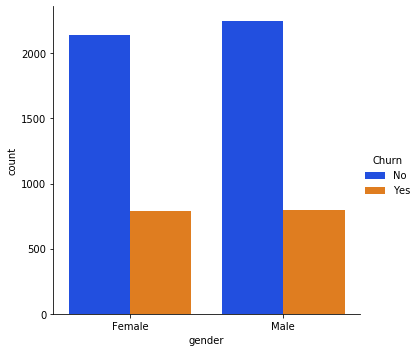

In [105]:
sns.catplot(x='gender', hue='Churn', kind='count', palette='bright', data=df)

- About half of the customers in our data set are male while the other half are female and both are equally likely to churn.

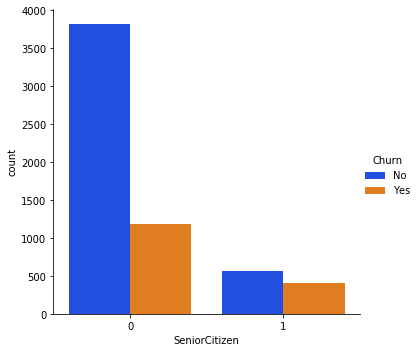

In [106]:
sns.catplot(x='SeniorCitizen',hue='Churn', palette='bright',kind='count',data=df)

- There are approx 15-20% of the customers who are senior citizens and most of our customers in the data are younger people.

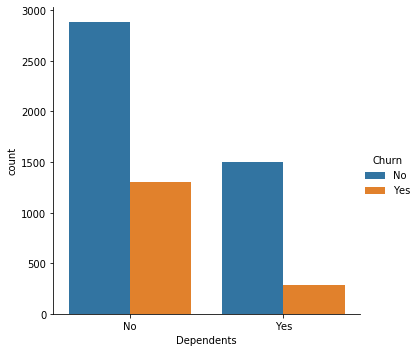

In [229]:
sns.catplot(x='Dependents',hue='Churn',kind='count',data=df)

- About 30-40% of customers have dependents and thus they are less likely to churn.
- Most Customers are those who do not have anyone who depends on them 

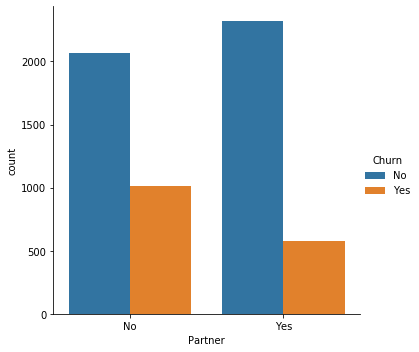

In [230]:
sns.catplot(x='Partner',hue='Churn',kind='count',data=df)

 - Around 45-50% Customers have partners while Single customers Churn more
    
    

### - *Exploring features desciribing services used by customers*

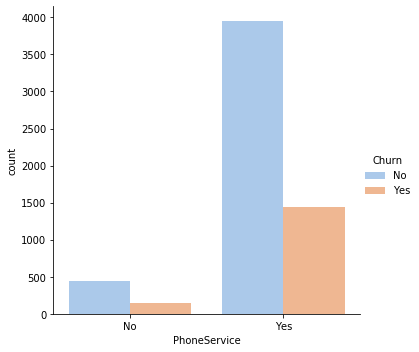

In [231]:
sns.catplot(x='PhoneService', hue='Churn', kind='count', palette='pastel', data=df)

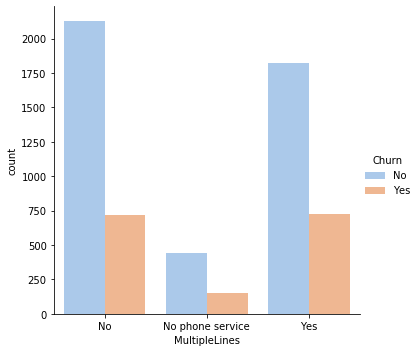

In [109]:
sns.catplot(x='MultipleLines', hue='Churn', kind='count', palette='pastel', data=df)

In [244]:
pd.crosstab(index = df["PhoneService"], columns = df["MultipleLines"])

MultipleLines,No,No phone service,Yes
PhoneService,,,
No,0,588,0
Yes,2843,0,2545


**INFERENCE-**

- If the subscribers have phone service, they may have multiple lines (yes or no).

- But if the subscribers don't have phone service, the subscribers will never have multiple lines.

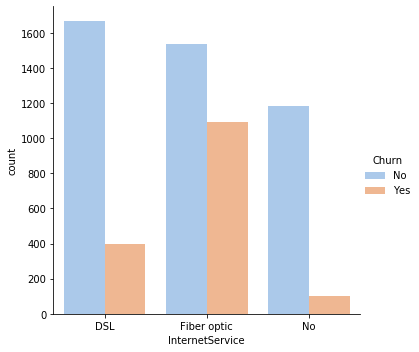

In [245]:
sns.catplot(x='InternetService', hue='Churn', kind='count', palette='pastel', data=df)

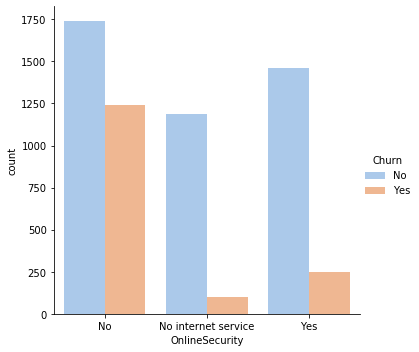

In [110]:
sns.catplot(x='OnlineSecurity', hue='Churn', kind='count', palette='pastel', data=df)

In [247]:
pd.crosstab(index = df["InternetService"], columns = df["OnlineSecurity"])

OnlineSecurity,No,No internet service,Yes
InternetService,,,
DSL,1072,0,992
Fiber optic,1910,0,717
No,0,1285,0


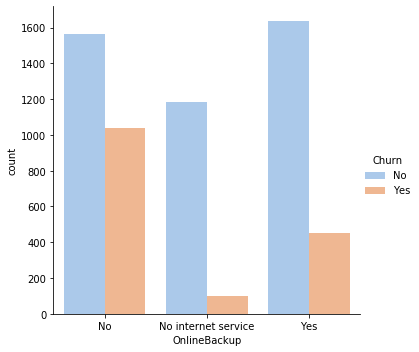

In [111]:
sns.catplot(x='OnlineBackup', hue='Churn', kind='count', palette='pastel', data=df)

In [248]:
pd.crosstab(index = df["InternetService"], columns = df["OnlineBackup"])

OnlineBackup,No,No internet service,Yes
InternetService,,,
DSL,1130,0,934
Fiber optic,1474,0,1153
No,0,1285,0


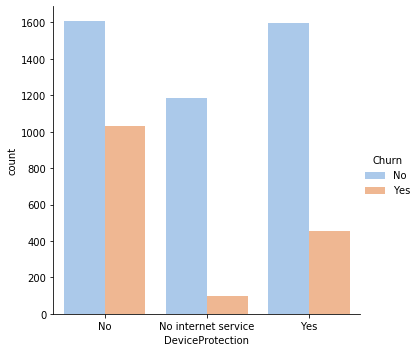

In [112]:
sns.catplot(x='DeviceProtection', hue='Churn', kind='count', palette='pastel', data=df)

In [249]:
pd.crosstab(index = df["InternetService"], columns = df["DeviceProtection"])

DeviceProtection,No,No internet service,Yes
InternetService,,,
DSL,1157,0,907
Fiber optic,1482,0,1145
No,0,1285,0


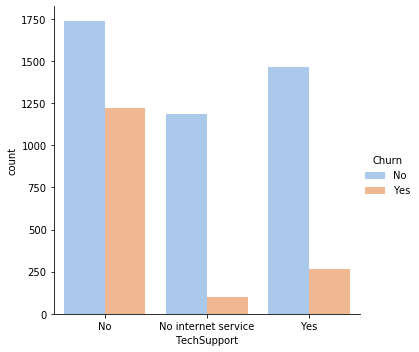

In [113]:
sns.catplot(x='TechSupport', hue='Churn', kind='count', palette='pastel', data=df)

In [250]:
pd.crosstab(index = df["InternetService"], columns = df["TechSupport"])

TechSupport,No,No internet service,Yes
InternetService,,,
DSL,1071,0,993
Fiber optic,1888,0,739
No,0,1285,0


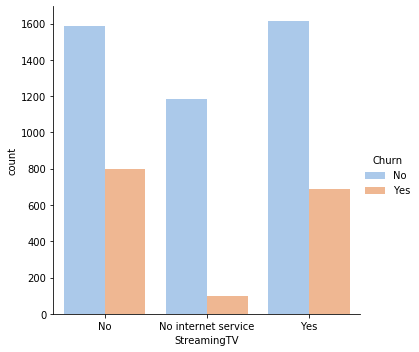

In [114]:
sns.catplot(x='StreamingTV', hue='Churn', kind='count', palette='pastel', data=df)

In [251]:
pd.crosstab(index = df["InternetService"], columns = df["StreamingTV"])

StreamingTV,No,No internet service,Yes
InternetService,,,
DSL,1245,0,819
Fiber optic,1143,0,1484
No,0,1285,0


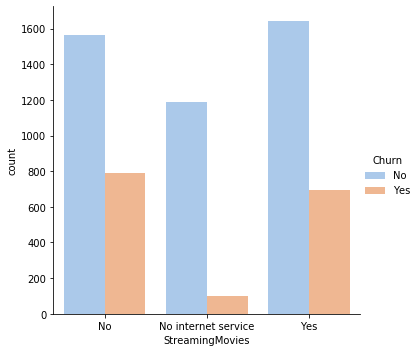

In [115]:
sns.catplot(x='StreamingMovies', hue='Churn', kind='count', palette='pastel', data=df)

In [246]:
pd.crosstab(index = df["InternetService"], columns = df["StreamingMovies"])

StreamingMovies,No,No internet service,Yes
InternetService,,,
DSL,1212,0,852
Fiber optic,1141,0,1486
No,0,1285,0


**INFERENCE-**

- If the subscribers have Internet services (either DSL or Fiber optic), the subscribers may opt to have other services related to Internet (i.e. streaming TV, device protection).

- But if the subscribers don't have the Internet services, this secondary service will not be available for the subscribers.

***conclusion*** : *No Internet/Phone service is just creating redundancy. When we preprocess the data, we will replace NO SERVICE with NO and will proceed with only two categories for these features*

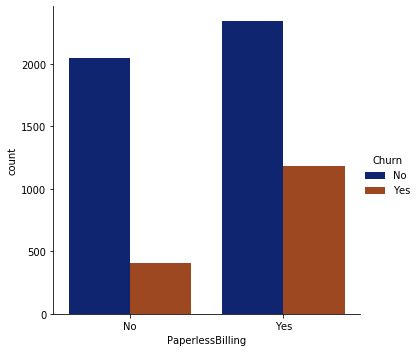

In [117]:
sns.catplot(x='PaperlessBilling', hue='Churn', kind='count', palette='dark', data=df)

- Customers who use paperless billing methods churn at a comparatively very higher rate than those who does not use paperless billing service.

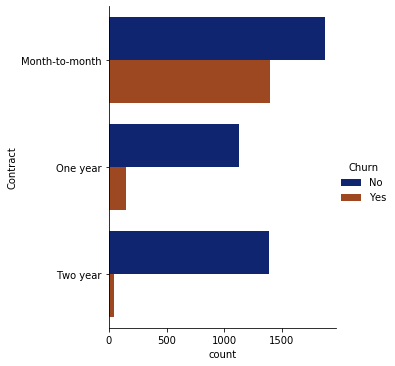

In [118]:
sns.catplot(y='Contract', hue='Churn', kind='count', palette='dark', data=df)

- Shorter the Contract of a customer, higher the chance that he/she will churn.

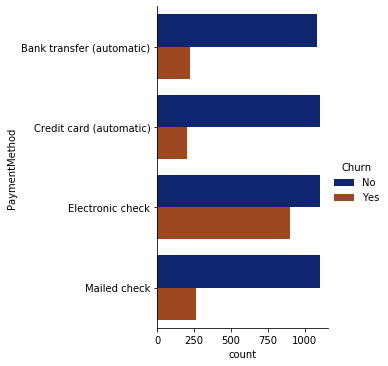

In [119]:
sns.catplot(y='PaymentMethod', hue='Churn', kind='count', palette="dark", data=df)

- Most Churn Customers were those who used Electronic Check for Payment.

*-Continuous Features*

In [120]:
df[['tenure', 'MonthlyCharges', 'TotalCharges']].corr()

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.255676,0.827439
MonthlyCharges,0.255676,1.000000,0.656534
TotalCharges,0.827439,0.656534,1.000000


Tenure-TotalCharges & Tenure-MonthlyCharges are positively correlated

In [121]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,5976.000000,5976.000000,5976.000000
mean,32.523092,64.846687,2298.060617
std,24.500858,30.107576,2274.127165
min,1.000000,18.250000,18.800000
25%,9.000000,35.750000,404.312500
50%,29.000000,70.425000,1412.150000
75%,56.000000,89.900000,3846.962500
max,72.000000,118.750000,8684.800000


In [122]:
df['Churn']

0        No
1        No
2       Yes
3        No
4        No
       ... 
5981    Yes
5982     No
5983     No
5984    Yes
5985     No
Name: Churn, Length: 5976, dtype: category
Categories (2, object): [No, Yes]

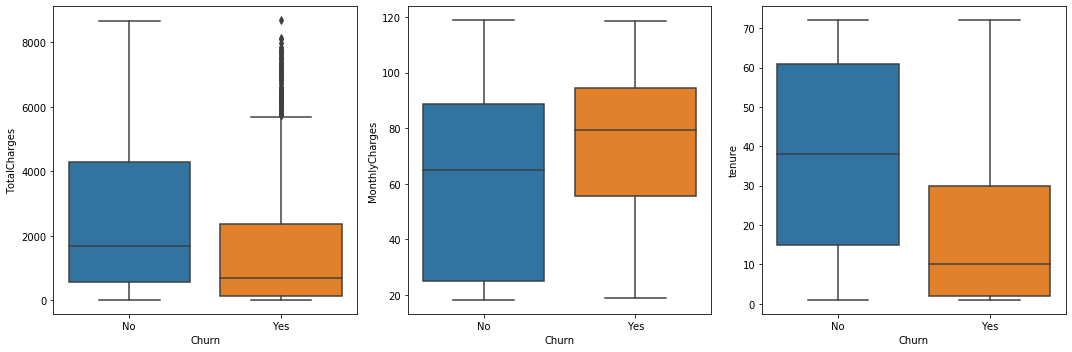

In [123]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
cols = ['TotalCharges', 'MonthlyCharges', 'tenure']
for i in range(len(cols)):
    sns.boxplot(x=df["Churn"], y=cols[i], data=df, ax=axes[i])
fig.tight_layout()

 Churn Customers have:

- tenure around of 0 to 25 months , mostly 10(mean)

- Monthly Charges from 60 to 85

- Total Charges upto 2000


# Data Preprocessing

In [124]:
X = df.iloc[:,1:-1]
y = df.loc[:,['Churn']]

In [252]:
from sklearn.preprocessing import FunctionTransformer

def convert_no_services(X):
    """This function replaces 'No Internet/Phone' Service with 'No' for the apt. variables"""
    for col in X.columns.values:
        for cat in X[col].unique():
            try:
                if cat.find('service') != -1:

                    if cat.find('internet') != -1:

                        X[col] = X[col].replace({'No internet service':'No'}).astype("category")

                    elif cat.find('phone') !=  -1:

                        X[col] = X[col].replace({'No phone service':'No'}).astype("category")

            except:
                pass
    return X

    
services_ = FunctionTransformer(convert_no_services, validate=False)

In [126]:
X.head(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65
1,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20
2,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85
3,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50


In [127]:
X = services_.fit_transform(X)

In [128]:
X.head(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Male,0,Yes,Yes,72,Yes,Yes,No,No,No,No,No,No,No,Two year,No,Credit card (automatic),24.10,1734.65
1,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20
2,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85
3,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50


In [129]:
for col in X.columns:
    print(col.upper())
    print(X[col].unique())
    print()

GENDER
[Male, Female]
Categories (2, object): [Male, Female]

SENIORCITIZEN
[0, 1]
Categories (2, int64): [0, 1]

PARTNER
[Yes, No]
Categories (2, object): [Yes, No]

DEPENDENTS
[Yes, No]
Categories (2, object): [Yes, No]

TENURE
[72 44 38  4  2 70 33  1 39 55 52 30 60 50 32 51 69 42 14 62  5 63 67 40
 65 16 46 11 49 68 10 53 54 15  3 71  8 64 57 20 26 31  7 35  6 13 23  9
 45 17 34 58 12 25 28 29 43 19 41 37 27 22 24 18 56 66 59 48 47 61 21 36]

PHONESERVICE
[Yes, No]
Categories (2, object): [Yes, No]

MULTIPLELINES
[Yes, No]
Categories (2, object): [Yes, No]

INTERNETSERVICE
[No, Fiber optic, DSL]
Categories (3, object): [No, Fiber optic, DSL]

ONLINESECURITY
[No, Yes]
Categories (2, object): [No, Yes]

ONLINEBACKUP
[No, Yes]
Categories (2, object): [No, Yes]

DEVICEPROTECTION
[No, Yes]
Categories (2, object): [No, Yes]

TECHSUPPORT
[No, Yes]
Categories (2, object): [No, Yes]

STREAMINGTV
[No, Yes]
Categories (2, object): [No, Yes]

STREAMINGMOVIES
[No, Yes]
Categories (2, object): [

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5976 entries, 0 to 5985
Data columns (total 21 columns):
customerID          5976 non-null object
gender              5976 non-null category
SeniorCitizen       5976 non-null category
Partner             5976 non-null category
Dependents          5976 non-null category
tenure              5976 non-null int64
PhoneService        5976 non-null category
MultipleLines       5976 non-null category
InternetService     5976 non-null category
OnlineSecurity      5976 non-null category
OnlineBackup        5976 non-null category
DeviceProtection    5976 non-null category
TechSupport         5976 non-null category
StreamingTV         5976 non-null category
StreamingMovies     5976 non-null category
Contract            5976 non-null category
PaperlessBilling    5976 non-null category
PaymentMethod       5976 non-null category
MonthlyCharges      5976 non-null float64
TotalCharges        5976 non-null float64
Churn               5976 non-null catego

In [131]:
categorical_columns = list(X.select_dtypes(include='category').columns)
numeric_columns = list(X.select_dtypes(exclude='category').columns)

In [132]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

## Column Transformer
transformers = [('one_hot_encoder', OneHotEncoder(drop='if_binary',dtype='int'),categorical_columns),
               ('Standard_Scaler', StandardScaler(), numeric_columns)]

                
x_trans = ColumnTransformer(transformers, remainder='passthrough')

## Applying Column Transformer
X = pd.DataFrame(x_trans.fit_transform(X))


## Label encoding --> Yes=1 , No=0
y_trans = LabelEncoder()
y = pd.DataFrame(y_trans.fit_transform(y.Churn), columns=["Churn"])



## Save feature names after one-hot encoding
feature_names = list(x_trans.named_transformers_['one_hot_encoder'] \
                            .get_feature_names(input_features=categorical_columns))
feature_names = feature_names + numeric_columns

In [133]:
X.shape, y.shape

((5976, 26), (5976, 1))

In [134]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.611381,-1.353483,-0.247769
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.468468,0.774066,0.736669
2,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.223558,0.335602,0.251453
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-1.164265,-0.297182,-0.905725
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.245901,-0.378564,-0.958057


In [135]:
X.columns=feature_names
X.head().T

,0,1,2,3,4
gender_Male,1.000000,0.000000,0.000000,1.000000,1.000000
SeniorCitizen_1,0.000000,0.000000,1.000000,0.000000,0.000000
Partner_Yes,1.000000,0.000000,1.000000,0.000000,0.000000
Dependents_Yes,1.000000,0.000000,0.000000,0.000000,0.000000
PhoneService_Yes,1.000000,1.000000,1.000000,1.000000,1.000000
MultipleLines_Yes,1.000000,0.000000,1.000000,0.000000,0.000000
InternetService_DSL,0.000000,0.000000,0.000000,1.000000,1.000000
InternetService_Fiber optic,0.000000,1.000000,1.000000,0.000000,0.000000
InternetService_No,1.000000,0.000000,0.000000,0.000000,0.000000
OnlineSecurity_Yes,0.000000,0.000000,0.000000,0.000000,1.000000


In [136]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
gender_Male,5976.0,5.093708e-01,0.499954,0.000000,0.000000,1.000000,1.000000,1.000000
SeniorCitizen_1,5976.0,1.616466e-01,0.368157,0.000000,0.000000,0.000000,0.000000,1.000000
Partner_Yes,5976.0,4.846051e-01,0.499805,0.000000,0.000000,0.000000,1.000000,1.000000
Dependents_Yes,5976.0,2.980254e-01,0.457429,0.000000,0.000000,0.000000,1.000000,1.000000
PhoneService_Yes,5976.0,9.016064e-01,0.297871,0.000000,1.000000,1.000000,1.000000,1.000000
MultipleLines_Yes,5976.0,4.258701e-01,0.494516,0.000000,0.000000,0.000000,1.000000,1.000000
InternetService_DSL,5976.0,3.453815e-01,0.475532,0.000000,0.000000,0.000000,1.000000,1.000000
InternetService_Fiber optic,5976.0,4.395917e-01,0.496379,0.000000,0.000000,0.000000,1.000000,1.000000
InternetService_No,5976.0,2.150268e-01,0.410875,0.000000,0.000000,0.000000,0.000000,1.000000
OnlineSecurity_Yes,5976.0,2.859772e-01,0.451916,0.000000,0.000000,0.000000,1.000000,1.000000


## PCA


In [137]:
from sklearn.decomposition import PCA


In [138]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) 
# In the transformer, we only standardized the numeric features.
# PCA works better if the entire dataset is standardized.

In [253]:
pca = PCA(n_components=2) # reducing the dimensions of the dataset to 2 for visualization 

In [140]:
X2D = pca.fit_transform(X_scaled)

In [141]:
X2D = pd.DataFrame(X2D,columns=['PC1','PC2'])
X2D

,PC1,PC2
0,-1.174865,3.276985
1,1.337221,-1.314457
2,0.192528,-1.711551
3,-1.691656,-1.849649
4,-1.609466,-0.866490
...,...,...
5971,0.388820,-2.717972
5972,3.194413,2.145307
5973,-2.945195,-0.340135
5974,1.249801,-3.787495


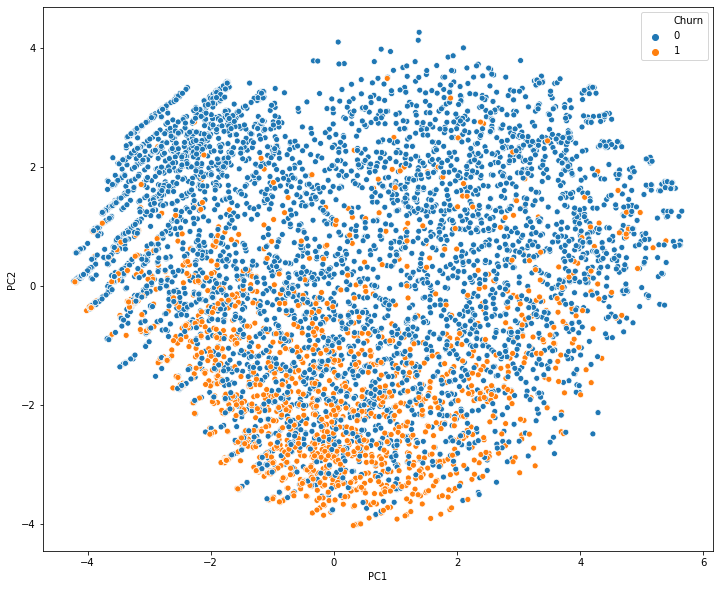

In [218]:
%matplotlib inline
plt.figure(figsize=(12,10))
sns.scatterplot(X2D.iloc[:,0], X2D.iloc[:,1], hue=y.iloc[:,0])
plt.show()

**The classes are not linearly separable**


# Splitting the data into train & test data 

In [143]:
X.shape, y.shape

((5976, 26), (5976, 1))

In [144]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,shuffle=True,
                                                    stratify=y, random_state=0)


X_train.shape, X_test.shape, y_train.shape,  y_test.shape 


((4183, 26), (1793, 26), (4183, 1), (1793, 1))

### Trying out different models with cross Validation data

In [150]:
import warnings
warnings.filterwarnings('ignore')

In [151]:
validation = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0)


In [152]:
models  = []

models.append(("LR",LogisticRegression(max_iter=10000, class_weight='balanced')))

models.append(('SVC',SVC(C=30, kernel='rbf', random_state=0,class_weight='balanced')))

models.append(("RF",RandomForestClassifier( criterion='entropy',
                                       max_depth=6, n_estimators=100,class_weight='balanced',
                                       n_jobs=-1, random_state=0)))

models.append(("Dtree",DecisionTreeClassifier(criterion='entropy',
                                       max_depth=6,class_weight='balanced',
                                       random_state=0)))

models.append(("XGB",XGBClassifier(max_depth=6,class_weight='balanced')))

for name,model in models:
    cv_result = cross_val_score(model,X_train,y_train, cv = validation,scoring = "roc_auc")
    print(name, cv_result,end="\n"+'-'*90+"\n")
    print("MEAN : ", cv_result.mean(),end="\n"+"="*30+"\n")



LR [0.84031715 0.82422911 0.83752794 0.84771253 0.83762508 0.82013477
 0.83443199 0.83278071 0.85168882 0.84028083 0.82304622 0.84589468
 0.84264034 0.84002406 0.8264592 ]
------------------------------------------------------------------------------------------
MEAN :  0.8363195612680471
SVC [0.76876511 0.77311214 0.78337302 0.78018165 0.76836283 0.76486486
 0.79596426 0.77078921 0.78349033 0.76519353 0.74744379 0.78682341
 0.78308818 0.77886111 0.77131203]
------------------------------------------------------------------------------------------
MEAN :  0.7747750291599612
RF [0.84421739 0.82993481 0.84398417 0.84495774 0.83990301 0.8221563
 0.8345382  0.83123968 0.85567612 0.84905508 0.82614077 0.85307625
 0.83993076 0.8419095  0.83089767]
------------------------------------------------------------------------------------------
MEAN :  0.8391744974229555
Dtree [0.81277009 0.80471691 0.80036444 0.82662426 0.79218021 0.77777778
 0.81328279 0.80029506 0.8196144  0.81230009 0.78738739 0

All the above estimators are working good at cross validation , We'll XgBoost in this kernel.

You must try out others as well

# XGBoost

### Model Training

In [153]:
from sklearn.model_selection import RandomizedSearchCV

In [154]:
XGB = XGBClassifier(random_state=0)

In [155]:
param_grid = {
    'silent': [False],
    'max_depth': [ 4, 5, 6, 7, 8],
    'learning_rate': [0.01,0.05, 0.08, 0.1, 0.1, 0.2, 0.3],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'colsample_bylevel': [0.7, 0.8, 0.9, 1.0],
    'min_child_weight': [0.5, 1.0, 3.0],
    'gamma': [0, 0.25, 0.5, 1.0],
    'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0],
    'n_estimators': [50, 100, 150, 200, 300],
    'scale_pos_weight': [1, 1.5, 2, 2.5, 3],
    'max_delta_step': [1, 2, 3]
}

clf = XGBClassifier(objective = 'binary:logistic', random_state=0)

In [156]:
rs_clf = RandomizedSearchCV(clf, param_grid, n_iter=50,
                            n_jobs=4, verbose=2, cv=5,
                            scoring= 'roc_auc', refit=True, random_state=0)

import time
print("Randomized search..")
search_time_start = time.time()
rs_clf.fit(X_train, y_train)
print("Randomized search time:", time.time() - search_time_start,"seconds.")

Randomized search..
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Randomized search time: 46.62201118469238 seconds.


In [167]:
rs_clf.best_estimator_

XGBClassifier(colsample_bylevel=0.8, colsample_bytree=0.9, gamma=1.0,
              learning_rate=0.08, max_delta_step=1, max_depth=4,
              min_child_weight=1.0, n_estimators=50, reg_lambda=50.0,
              scale_pos_weight=3, silent=False, subsample=1.0)

In [168]:
rs_clf.best_params_

{'subsample': 1.0,
 'silent': False,
 'scale_pos_weight': 3,
 'reg_lambda': 50.0,
 'n_estimators': 50,
 'min_child_weight': 1.0,
 'max_depth': 4,
 'max_delta_step': 1,
 'learning_rate': 0.08,
 'gamma': 1.0,
 'colsample_bytree': 0.9,
 'colsample_bylevel': 0.8}

In [169]:
rs_clf.best_score_

0.8425198635407849

In [170]:
positive = np.count_nonzero(y_train)
negative = y_train.shape[0] - positive
positive, negative

(1111, 3072)

In [171]:
estimate = negative / positive
estimate # Weight for cost-sensitivity parameter of xgboost. (scale_pos_weight)

2.765076507650765

In [172]:
xgb_clf = XGBClassifier(colsample_bylevel=0.8, colsample_bytree=0.9, gamma=1.0,
              learning_rate=0.08, max_delta_step=1, max_depth=4,
              min_child_weight=1.0, n_estimators=50, reg_lambda=50.0,
              scale_pos_weight=estimate, silent=False, subsample=1.0,objective = 'binary:logistic')
xgb_clf.fit(X_train, y_train)

XGBClassifier(colsample_bylevel=0.8, colsample_bytree=0.9, gamma=1.0,
              learning_rate=0.08, max_delta_step=1, max_depth=4,
              min_child_weight=1.0, n_estimators=50, reg_lambda=50.0,
              scale_pos_weight=2.765076507650765, silent=False, subsample=1.0)

### Model Evaluation

In [173]:
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve
from sklearn.metrics import classification_report, precision_recall_curve
%matplotlib inline

In [174]:
y_pred = xgb_clf.predict(X_test)   
y_prob = xgb_clf.predict_proba(X_test)

In [175]:
y_prob_1 = y_prob[:, 1] # probabilties of positive class i.e Churn

In [177]:
print("Accuracy Score = ",accuracy_score(y_test, y_pred))

Accuracy Score =  0.7607361963190185


*Since the data is imbalanced, accuracy is not a good measure to evaluate the model.*

*So we don't mind if the accuracy of the model is low*

In [208]:
print(" Roc_Auc_Score = ",np.round(roc_auc_score(y_test, y_prob_1),3))

 Roc_Auc_Score =  0.85


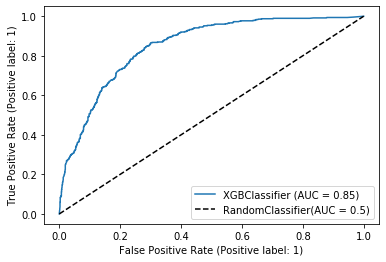

In [255]:
plot_roc_curve(xgb_clf, X_test, y_test)
plt.plot([0,1],[0,1], 'k--',label="RandomClassifier(AUC = 0.5)")
plt.legend()

Area under the curve = 0.85 indicates that the classifier is very good.

This is so because the classifier is able to detect more numbers of True positives and True negatives than False negatives and False positives.

<Figure size 720x720 with 0 Axes>

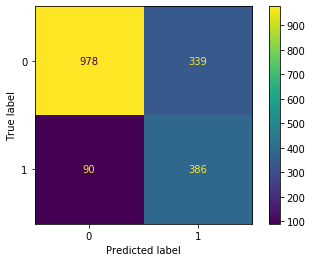

In [180]:
plt.figure(figsize=(10,10))
plot_confusion_matrix(xgb_clf, X_test, y_test)

In [181]:
Precision =  precision_score(y_test, y_pred)
Recall = recall_score(y_test, y_pred)
F1 = f1_score(y_test, y_pred)

print(f'Precision : {Precision}\nRecall : {Recall}\nF1 Score : {F1}')

Precision : 0.5324137931034483
Recall : 0.8109243697478992
F1 Score : 0.6427976686094921


**It's okay if we sacrifice precision for a good recall here, because:**

- we can afford misclassifying a non-churner as a churn customer and puuting extra efforts in oreder to retain him/her for the company 
- But we cannot afford missing out churn customers and lose them.

- So recall is more important than precision in this case.

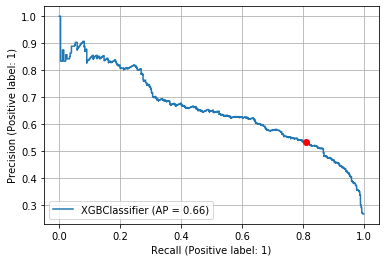

In [214]:
plot_precision_recall_curve(xgb_clf, X_test, y_test)
plt.plot(Recall,Precision,marker="o",c='red')
plt.grid()

In [184]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.74      0.82      1317
           1       0.53      0.81      0.64       476

    accuracy                           0.76      1793
   macro avg       0.72      0.78      0.73      1793
weighted avg       0.81      0.76      0.77      1793



In [203]:
precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob_1)
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    %matplotlib inline
    plt.figure(figsize=(10,6))
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], 'g-', label="Recall")
    plt.legend()
    plt.grid(True)
    plt.show()

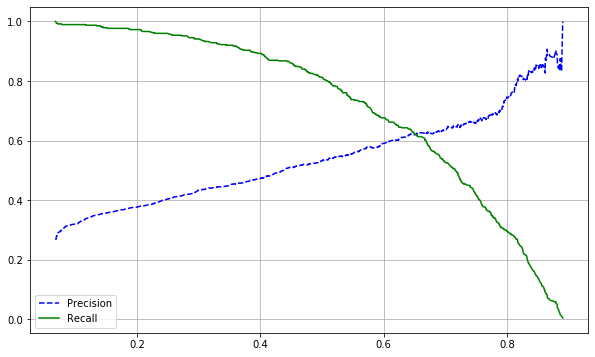

In [204]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

The reason for the classifier is not achieving higher F1 scores (like > 95%) is because the churn and no-churn classes are overlapping making it difficult for the classifier to identify a perfect decision boundary without sacrificing either precision or recall.

## Important Features

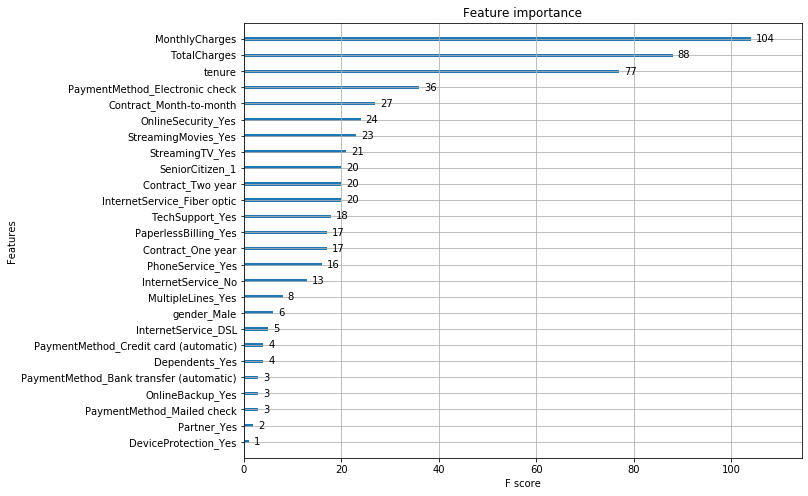

In [187]:
from xgboost import plot_importance
fig, ax = plt.subplots(figsize=(10,8))
plot_importance(xgb_clf, ax=ax)

# Application

Normally in business setting, we will use the prediction score, rather than the class prediction. This score is used to associate with the subscriber profiles, and can be used to adjust for campaign targeting.

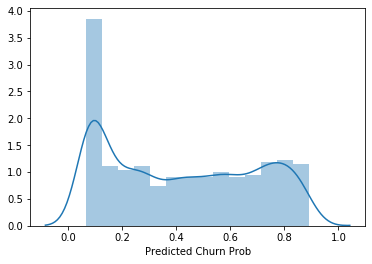

In [261]:
churn_probs = xgb_clf.predict_proba(X)[:,1]
df["Predicted Churn Prob"] = churn_probs
sns.distplot(df["Predicted Churn Prob"])

In [265]:
df[['customerID', 'Churn', 'Predicted Churn Prob']].tail(10)

,customerID,Churn,Predicted Churn Prob
5976,6386-SZZKH,Yes,0.392366
5977,9076-AXYIK,No,0.273634
5978,3278-FSIXX,No,0.761624
5979,6408-WHTEF,No,0.077571
5980,6032-IGALN,Yes,0.682683
5981,0684-AOSIH,Yes,0.849737
5982,5982-PSMKW,No,0.091661
5983,8044-BGWPI,No,0.384595
5984,7450-NWRTR,Yes,0.855781
5985,4795-UXVCJ,No,0.104684


----------------------------------------**THANK YOU**----------------------------------------------